# Machine learning basics: Exercises

## Exercise 1 MNIST data set
The MNIST database is a well-known collection of handwritten digit images used for training and testing machine learning algorithms, particularly in the field of image recognition. MNIST stands for Modified National Institute of Standards and Technology database. The database contains 60,000 training examples and 10,000 testing examples. Each example is a grayscale image of a handwritten digit (0 to 9) with a resolution of 28x28 pixels. The images are normalized and centered, making them consistent for analysis



#### Goal: train a classification machine learning model to predict the number of a given image
The training set is composed of 1797 matrices of the shape 8x8. We can visualise the content of the matrix with the matplotlib function .imshow(). 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import keras 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
#Profile.activations()


In [ ]:
digits = datasets.load_digits()
X = digits.data  # shape: (1797, 64), each image is 8x8 pixels flattened
y = digits.target
class_names = digits.target_names

(360,)

In [9]:
X.shape

(1797, 64)

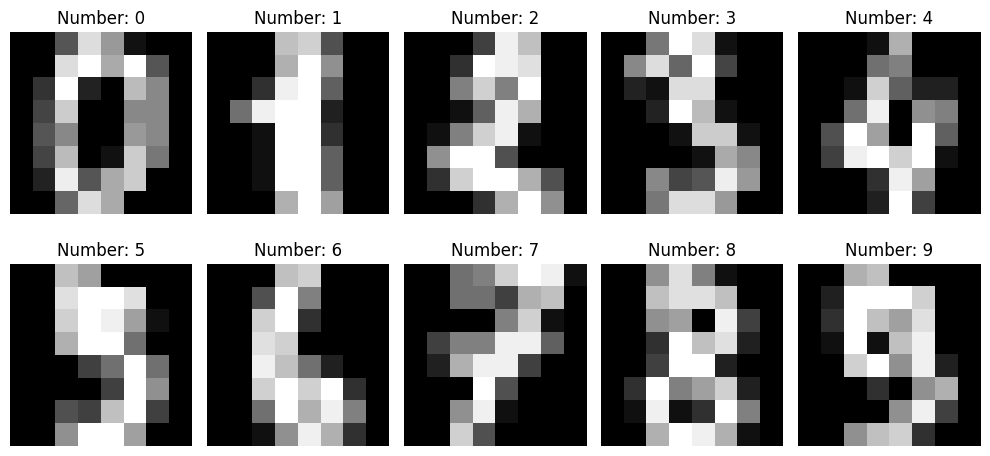

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Number: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# data preparation 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# rescale X 
print(x_train.shape, x_train.dtype, x_train.min(), x_train.max())
print(y_train.shape, y_train.dtype, y_train.min(), y_train.max())

x_train = x_train/16
x_test = x_test/16
x_train.min(), x_train.max()

# reshape images 
x_train = x_train.reshape(-1, 8, 8, 1)
x_test = x_test.reshape(-1, 8, 8, 1)
x_train.shape, x_test.shape

# one-hot encoding y 
y_train_oh = np.eye(10)[y_train]
y_test_oh = np.eye(10)[y_test]

(1437, 64) float64 0.0 16.0
(1437,) int64 0 9


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [46]:
# model 
model = keras.Sequential([
    keras.layers.Input(shape=(8,8,1)),
    keras.layers.Flatten(name='In'),
    keras.layers.Dense(16, activation='relu', name='L1'),
    keras.layers.Dense(16, activation='relu', name='L2'),
    keras.layers.Dense(10, activation='softmax', name='Out')
])
model.summary()

# compile
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics = [keras.metrics.CategoricalAccuracy(name="accuracy"),
    ], 
)

# fit the model
history = model.fit(x_train, y_train_oh, validation_data=(x_test, y_test_oh), 
                    batch_size=10, epochs=100, shuffle=True, verbose=1)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ In (Flatten)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Out (Dense)                     │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,482 (5.79 KB)

 Trainable params: 1,482 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1071 - loss: 2.3376 - val_accuracy: 0.1139 - val_loss: 2.3076
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1349 - loss: 2.3006 - val_accuracy: 0.1361 - val_loss: 2.2770
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1591 - loss: 2.2772 - val_accuracy: 0.1750 - val_loss: 2.2482
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1842 - loss: 2.2430 - val_accuracy: 0.2139 - val_loss: 2.2164
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2018 - loss: 2.2126 - val_accuracy: 0.2333 - val_loss: 2.1810
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2379 - loss: 2.1630 - val_accuracy: 0.2333 - val_loss: 2.1429
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2317 - loss: 2.1327 - val_accuracy: 0.2333 - val_loss: 2.1027
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2408 - loss: 2.0863 - val_accu

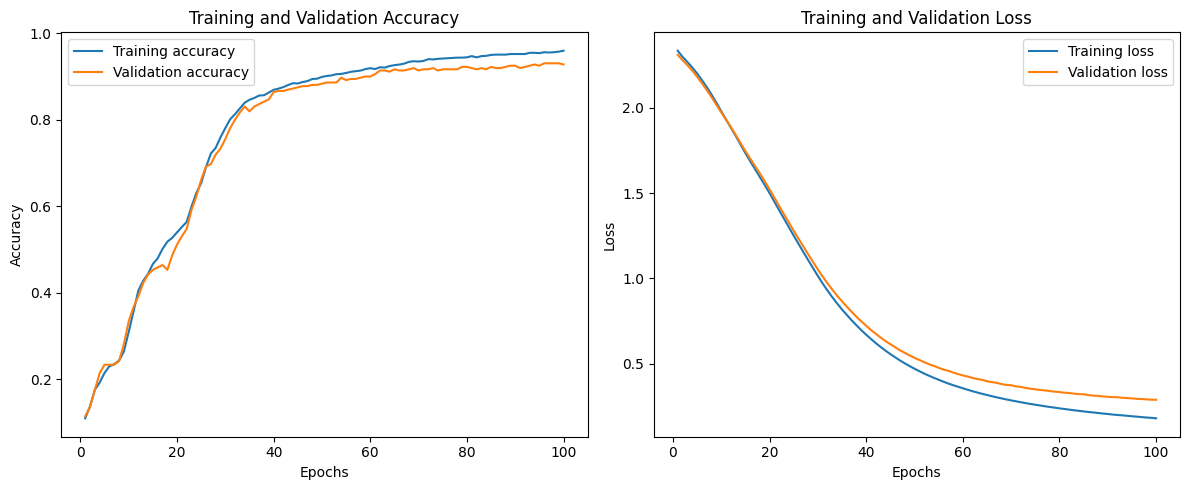

In [54]:
# check accuracy 
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9228 - loss: 0.3746 
Percentage of misclassification: 7.222223281860352


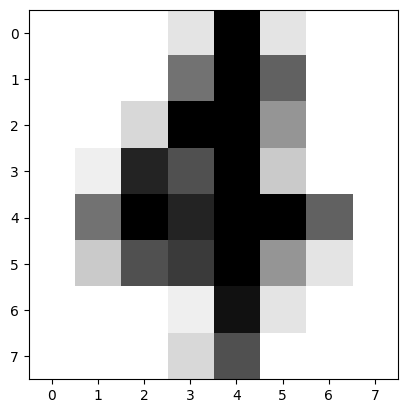

In [80]:
# check real predictions
predictions = model.predict(x_test)
x_test.shape, predictions.shape

np.argmax(predictions[0]) # 4 
plt.imshow(x_test[0], cmap='Greys')
y_test[0]

# percentage of misclassifiations
m = model.evaluate(x_test, y_test_oh)
print(f"Percentage of misclassification:", (1-m[1]) * 100) 

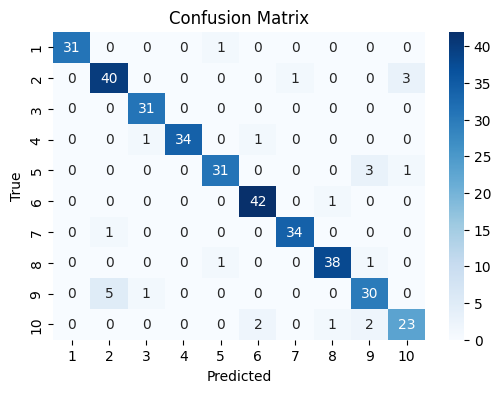

In [81]:
y_pred_arg = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred_arg)
class_names=['1','2','3','4','5','6','7','8','9','10']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Exercise 2: Classification of astronomical objects using Sloan Digital Sky Survey (SDSS) Data release 14
The SDSS (https://www.sdss.org/) is imaging and spectroscopic astronomical survey that utilizes a 2.5-meter optical telescope at Apache Point Observatory in New Mexico, United States.

The data release 14 (DR14) of the SDSS consists of 10,000 observations of various astronomical objects, each described by 17 feature columns and 1 class column which identifies the observation as either a star, galaxy, or quasar. 

#### Goal: build a classification algorithm that predicts if a certain object is either a star, galaxy or a quasar
Remember to visualize your data!

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset (assumes CSV format, e.g., sdss.csv)
df = pd.read_csv("sdss.csv")  # Replace with your path

# View column names (usually includes: 'u', 'g', 'r', 'i', 'z', 'class')
# print(df.head())

# df.keys()

In [98]:
features = df.columns.drop('class')
target = 'class'
x = df[features]
y = df[target]

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 17), (2000, 17), (8000,), (2000,))

In [104]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

# one-hot / dummy matrix 
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)

In [108]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(17,), name="In"),
        keras.layers.Dense(25, activation='relu', name="L1"),
        keras.layers.Dense(25, activation='relu', name="L2"),
        keras.layers.Dense(3, activation='softmax', name="Out")
    ]
)
model.summary()

model.compile(
    loss=keras.losses.CategoricalCrossentropy(), ### loss function
    optimizer=keras.optimizers.Adam(), ### optimizer
    metrics=[        
        keras.metrics.CategoricalAccuracy(name="accuracy"), ## metric to assess performance
    ],
)

history = model.fit(
    x_train,
    y_train_oh,
    validation_data=(x_test, y_test_oh),
    batch_size=3,
    epochs=100,
    shuffle=True,
    verbose=1
)




Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Out (Dense)                     │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,178 (4.60 KB)

 Trainable params: 1,178 (4.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 4s 957us/step - accuracy: 0.6344 - loss: 26121396241301504.0000 - val_accuracy: 0.7770 - val_loss: 3419335133495296.0000
Epoch 2/100
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.6567 - loss: 5552203007787008.0000 - val_accuracy: 0.7660 - val_loss: 3292076594692096.0000
Epoch 3/100
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.6779 - loss: 3995633845272576.0000 - val_accuracy: 0.7770 - val_loss: 5407561931030528.0000
Epoch 4/100
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - accuracy: 0.6720 - loss: 3179041913831424.0000 - val_accuracy: 0.7835 - val_loss: 3554549562343424.0000
Epoch 5/100
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.6709 - loss: 2099298409906176.0000 - val_accuracy: 0.7825 - val_loss: 1786865040490496.0000
Epoch 6/100
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 2s 773us/step - accuracy: 0.6587 - loss: 1181433565544448.0000 - val_accuracy: 0.7825 - val_loss: 1169972847968256.0000
Epoch 7/100
2667/2667